<a href="https://colab.research.google.com/github/markbojic/genetic-alg/blob/main/Genetski_domaci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Domaci

- Kontinualni genetski algoritam
- Metoda jednostavnog mesanja za kontinualni genetski algoritam (Redklif), sa slucajno izabranim parametrom
- Tackasta uniformna mutacija za kontinualni genetski algoritam (bira se slucajna vrednost iz domena gena po uniformnoj raspodeli)
- Minimalizacija funkcije Trogrba kamila



In [ ]:
### KONFIGURACIJA ###

BROJ_POKRETANJA = 3
BROJ_GENERACIJA = 500
# ver mutacije
mut_rates = [0.05, 0.1, 0.2]
MUT_RAT = mut_rates[1]
# velicine populacije
pop1 = 20
pop2 = 100
pop3 = 150
POPULACIJA = pop2
# ako nema poboljsanja nakon ovoliko generacija onda se prekida algoritam
KONVERGIRANJE = 100
# −5 ≤ x, y ≤ 5, ocekivani minimum f(0,0) = 0
MIN = -5
MAX = 5

Pokretanje: GA 0.1 1
211 [-4.765530831960672e-15, -1.0881105813542025e-14] 2.156732771864946e-28
Pokretanje: GA 0.1 2
205 [-1.513435094415853e-16, 1.1531775480210998e-15] 1.2011022358333908e-30
Pokretanje: GA 0.1 3
164 [-2.0514457455592994e-10, -1.8614188283169622e-10] 1.5700339084414398e-19
Najbolje resenje: [-1.513435094415853e-16, 1.1531775480210998e-15]
Najbolji trosak: 1.2011e-30


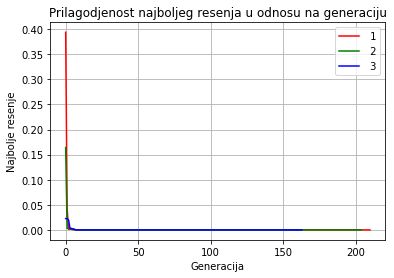

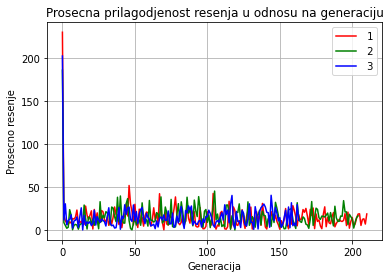

In [ ]:
import random
import math
import matplotlib.pyplot as plot

# Trogrba kamila f(x, y) = 2*x^2 - 1.05*x^4 + x^6/6 + x*y + y^2
def trosak(hromozom):
    x = hromozom[0]
    y = hromozom[1]
    return 2*(x**2) - 1.05*(x**4) + (x**6)/6 + x*y + y**2

# mutacija
def mutiraj(hromozom, rate):
    if random.random() < rate:
        for i in range(len(hromozom)):
            hromozom[i] = random.uniform(MIN, MAX)
    return hromozom

# redklif ukrstanje
# ppot = βp1 + (1 − β)p2
# u ovoj formuli:
# β ∈ [0,1] – udeo gena svakog od roditelja u potomku
# p1, p2 - roditeljski geni
# ppot - gen potomak
def ukrsti(hromozomi):
    beta = random.uniform(0, 1)
    p1 = random.choice(hromozomi)
    p2 = random.choice(hromozomi)

    ppot1 = []
    ppot1.append(beta * p1[0] + (1 - beta) * p2[0]) # ppot1 X
    ppot1.append(beta * p1[1] + (1 - beta) * p2[1]) # ppot1 Y
    ppot2 = []
    ppot2.append(beta * p2[0] + (1 - beta) * p1[0]) # ppot2 X
    ppot2.append(beta * p2[1] + (1 - beta) * p1[1]) # ppot2 Y

    return ppot1, ppot2

# kontinualni genetski algoritam
def genetski():
    pop_vel = POPULACIJA
    npop_vel = POPULACIJA

    best_ever_sol = None
    best_ever_f = None

    x_ose  = []
    y_ose1 = []
    y_ose2 = []

    for k in range(BROJ_POKRETANJA):
        print('Pokretanje: GA', MUT_RAT, k+1)
        best = None
        best_f = None
        generacija = 0
        konv = 0

        x_gen  = []
        y_f = []
        y_sf = []

        # napravi populaciju
        pop = []
        for _ in range(POPULACIJA):
            x = random.uniform(MIN, MAX)
            y = random.uniform(MIN, MAX)
            pop.append((x,y))
        #print(*pop, sep = ", ")
        while best_f != 0 and generacija < BROJ_GENERACIJA and konv < KONVERGIRANJE:
            konv += 1
            n_pop = pop[:]
            while len(n_pop) < pop_vel + npop_vel:
                h1, h2 = ukrsti(n_pop)
                mutiraj(h1, MUT_RAT)
                mutiraj(h2, MUT_RAT)
                n_pop.append(h1)
                n_pop.append(h2)
            # prosecna prilagodjenost
            pros_pril = 0
            for i in range(len(n_pop)):
                pros_pril += trosak((n_pop[i]))
            pros_pril /= len(n_pop)
            y_sf.append(pros_pril)
            #
            pop = sorted(n_pop, key=lambda x : trosak(x))[:pop_vel]
            f = trosak(pop[0]) # trenutni najbolji trosak
            y_f.append(f)
            if best_f is None or best_f > f:
                best_f = f
                best = pop[0]
                konv = 0
            generacija += 1
        # ako smo našli bolji od prethodnog, ažuriramo najbolje rešenje
        if best_ever_f is None or best_ever_f > best_f:
            best_ever_f = best_f
            best_ever_sol = best
        print(generacija, best, best_f)
        # za grafik
        x_gen = [x for x in range(generacija)]
        x_ose.append(x_gen)
        y_ose1.append(y_f)
        y_ose2.append(y_sf)

    print('Najbolje resenje: %s' % best_ever_sol)
    print('Najbolji trosak: %g' % best_ever_f)

    colors = ['r', 'g', 'b']

    for i in range(len(x_ose)):
        plot.plot(x_ose[i], y_ose1[i], str(colors[i] + '-'), label=' {}'.format(i+1))
    plot.legend(loc='best')
    plot.xlabel('Generacija')
    plot.ylabel('Najbolje resenje')
    plot.title('Prilagodjenost najboljeg resenja u odnosu na generaciju')
    plot.grid(True)
    plot.show()

    for i in range(len(x_ose)):
        plot.plot(x_ose[i], y_ose2[i], str(colors[i] + '-'), label=' {}'.format(i+1))
    plot.legend(loc='best')
    plot.xlabel('Generacija')
    plot.ylabel('Prosecno resenje')
    plot.title('Prosecna prilagodjenost resenja u odnosu na generaciju')
    plot.grid(True)
    plot.show()

# start
genetski()